# Examen de laboratorio - Parte 2
Manuel Astorgano

### Clase Neurona

In [63]:
class neurona(object):
    def __init__(self, f=0, c=0, dim=0):
        self.c = c
        self.f = f
        self.dim = dim
        self.w = normalize(0.5 - np.random.rand(dim).reshape(1,-1))
        self.label_winner = []
            
    def predict(self, inputs):
        return inputs @ self.w.T
    
    def fit(self, input, alfa=1):
        self.w = normalize(self.w + (alfa*input))

### Clase SOM

In [64]:
class som():
    
    def __init__(self, filas=1, columnas=1, dim=1):
        self.lista = []
        self.filas = filas
        self.columnas = columnas
        self.dim = dim
        for fila in range(self.filas):
            for columna in range(self.columnas):
                self.lista.append(neurona(f=fila, c=columna, dim=dim))
                
    def fit(self, inputs, max_epochs=1, init_radious=0, init_alfa=1):
        self.radious = init_radious
        self.alfa = init_alfa
        t = 0
        P = inputs.shape[0]
        for epoch in range(max_epochs):
            for x in inputs:
                self.alfa = init_alfa/(1.0 + float(t/P))
                i_gana, y_gana = -1, float('-inf')
                for i in range(self.filas*self.columnas):
                    y_predict = self.lista[i].predict(x.reshape(1,-1))
                    if y_predict > y_gana:
                        y_gana = y_predict
                        i_gana = i
                f_gana = int(i_gana / self.columnas)
                c_gana = i_gana % self.columnas
                
                # Conjunto de vecinas para un radious
                for f in range(f_gana - self.radious, f_gana + self.radious+1):
                    if f < 0:
                        row = self.filas + f
                    else:
                        if f > self.filas-1:
                            row = f % self.filas
                        else:
                            row = f

                    for c in range(c_gana - self.radious, c_gana + self.radious+1):
                        if c < 0:
                            column = self.columnas + c 
                        else:
                            if c > self.columnas-1:
                                column = c % self.columnas
                            else:
                                column = c
                        self.lista[(row*self.columnas) + column].fit(x.reshape(1,-1), alfa=self.alfa)
                t += 1
                if (t%1000) == 0:
                    print(t, self.radious, "  ", end='')
            if self.radious > 0:
                self.radious -= 1
                            
  
    def predict(self, inputs):
        output_list = []
        for x in inputs:
            for i in range(self.filas*self.columnas):
                output_list.append(self.lista[i].predict(x.reshape(1,-1)))
        return np.array(output_list).reshape(inputs.shape[0], -1)    
            

### Descripción del set de datos
Se trata de una tabla con 3500 observaciones.
Los atributos (columnas) son numéricos con rango 0, 255. Representan cada píxel de una imagen 28x28=784px.

In [84]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from tensorflow.keras.utils import to_categorical

### Lectura y tratamiento de datos
Se asignan los conjuntos correspondientes a X e y (datos y target respectivamente). Se normaliza X.

In [91]:
datos = pd.read_hdf('MNIST_3500.h5')
print(datos.shape)
datos.head()

(3500, 785)


0    1    2    3    4    5    6    7    8    9  ...  775  776  777  778  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783  target  
0  0.0  0.0  0.0  0.0  0.0       5  
1  0.0  0.0  0.0  0.0  0.0       0  
2  0.0  0.0  0.0  0.0  0.0       4  
3  0.0  0.0  0.0  0.0  0.0       1  
4  0.0  0.0  0.0  0.0  0.0       9  

[5 rows x 785 columns]

In [92]:
X = datos.iloc[:, :-1]
y = datos.iloc[:, 784]
X.shape, y.shape

((3500, 784), (3500,))


AttributeError: module 'numpy' haDividimos los datos en entrenamiento (3000) y test (500) como se indicó en clase. Normalizamos con MinMaxScaler y categorizamos las variables.

In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(np.array(X.iloc[:3000,:]))
X_test = scaler.fit_transform(np.array(X.iloc[3000:,:]))
y_train = to_categorical(y.iloc[:3000], dtype=int)
y_test = to_categorical(y.iloc[3000:], dtype=int)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3000, 784), (500, 784), (3000, 10), (500, 10))

### SOM
Creamos un SOM para los datos con los parámetros indicados. Tomamos como radio inicial 5 ya que es la mitad de la dimensión menor (10x10 en este caso).

In [95]:
mapa = som(filas=10, columnas=10, dim=784)
mapa.fit(X_train, max_epochs=20, init_radious=5, init_alfa=20)

1000 5   2000 5   3000 5   4000 4   5000 4   6000 4   7000 3   8000 3   9000 3   10000 2   11000 2   12000 2   13000 1   14000 1   15000 1   16000 0   17000 0   18000 0   19000 0   20000 0   21000 0   22000 0   23000 0   24000 0   25000 0   26000 0   27000 0   28000 0   29000 0   30000 0   31000 0   32000 0   33000 0   34000 0   35000 0   36000 0   37000 0   38000 0   39000 0   40000 0   41000 0   42000 0   43000 0   44000 0   45000 0   46000 0   47000 0   48000 0   49000 0   50000 0   51000 0   52000 0   53000 0   54000 0   55000 0   56000 0   57000 0   58000 0   59000 0   60000 0   

Ahora obtenemos las predicciones en forma de imagen para cada conjunto.

In [96]:
imgs_train = mapa.predict(X_train)
imgs_test = mapa.predict(X_test)

Es importante hacer un reshape de la imagen aplanada a matriz 10x10 para alimentar a la red.

In [117]:
imgs_train_res = np.array([x.reshape(10,10,1) for x in imgs_train])
imgs_test_res = np.array([x.reshape(10,10,1) for x in imgs_test])
imgs_train_res.shape, imgs_test_res.shape

((3000, 10, 10, 1), (500, 10, 10, 1))

## Red convolutiva
Importamos las capas necesarias:
- Conv2D para las convolutivas.
- MaxPooling y Flatten para el pooling y el aplanado.
- Dense para el MLP.

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
import matplotlib.pyplot as plt

Generamos el modelo con las capas convolucionales de 32 y 64 neuronas y kernel 3x3, pooling 2x2. Aplanamos después para alimentar al perceptrón y añadimos la capa de salida de 10 clases con softmax.

In [125]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(10,10,1), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), input_shape=(10,10,1), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

Compilamos el modelo según los parámetros indicados y lo entrenamos. Añadimos el conjunto de test como validación para obtener la gráfica.i

In [132]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics='accuracy')

In [133]:
history = model.fit(imgs_train_res, y_train, epochs=20, batch_size=30, validation_data=(imgs_test_res, y_test))

Epoch 1/20
100/100 [==============================] - 3s 22ms/step - loss: 0.1405 - accuracy: 0.9592 - val_loss: 0.3010 - val_accuracy: 0.9180
Epoch 2/20
100/100 [==============================] - 2s 17ms/step - loss: 0.1090 - accuracy: 0.9669 - val_loss: 0.2817 - val_accuracy: 0.9220
Epoch 3/20
100/100 [==============================] - 2s 19ms/step - loss: 0.1064 - accuracy: 0.9690 - val_loss: 0.2231 - val_accuracy: 0.9420
Epoch 4/20
100/100 [==============================] - 2s 16ms/step - loss: 0.0868 - accuracy: 0.9711 - val_loss: 0.2150 - val_accuracy: 0.9400
Epoch 5/20
100/100 [==============================] - 1s 14ms/step - loss: 0.0912 - accuracy: 0.9704 - val_loss: 0.2852 - val_accuracy: 0.9220
Epoch 6/20
100/100 [==============================] - 2s 18ms/step - loss: 0.0797 - accuracy: 0.9759 - val_loss: 0.3889 - val_accuracy: 0.8860
Epoch 7/20
100/100 [==============================] - 2s 15ms/step - loss: 0.0831 - accuracy: 0.9758 - val_loss: 0.2303 - val_accuracy: 0.9340

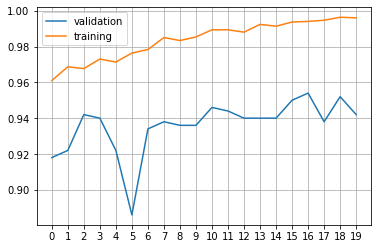

In [134]:
plt.plot(history.epoch, history.history['val_accuracy'], label='validation')
plt.plot(history.epoch, history.history['accuracy'], label='training')
plt.legend()
plt.grid()
plt.xticks(history.epoch)
plt.show()

### Conclusiones
Se obtiene la gráfica  con una tasa de acierto muy alta para el conjunto de entrenamiento. Observando el de validación, comprobamos que la diferencia es bastante grande. Esto es un indicador de sobreajuste ya que se ha usado el conjunto de test como validación. Lo correcto habría sido separar el conjunto en 3 (entrenamiento, validación y test).
Finalmente, se obtendría una accuracy más realista con el conjunto de test nunca visto por el clasificador.